In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
%matplotlib inline


In [2]:
from io import StringIO

data_csv = """
age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;y
58;management;married;tertiary;no;2143;yes;no;unknown;5;may;261;1;-1;0;unknown;no
44;technician;single;secondary;no;29;yes;no;unknown;5;may;151;1;-1;0;unknown;no
33;entrepreneur;married;secondary;no;2;yes;yes;unknown;5;may;76;1;-1;0;unknown;no
47;blue-collar;married;unknown;no;1506;yes;no;unknown;5;may;92;1;-1;0;unknown;no
33;unknown;single;unknown;no;1;no;no;unknown;5;may;198;1;-1;0;unknown;no
35;management;married;tertiary;no;231;yes;no;unknown;5;may;139;1;-1;0;unknown;no
28;management;single;tertiary;no;447;yes;yes;unknown;5;may;217;1;-1;0;unknown;no
42;entrepreneur;divorced;tertiary;yes;2;yes;no;unknown;5;may;380;1;-1;0;unknown;no
58;retired;married;primary;no;121;yes;no;unknown;5;may;50;1;-1;0;unknown;no
43;technician;single;secondary;no;593;yes;no;unknown;5;may;55;1;-1;0;unknown;no
41;admin.;divorced;secondary;no;270;yes;no;unknown;5;may;222;1;-1;0;unknown;no
29;admin.;single;secondary;no;390;yes;no;unknown;5;may;137;1;-1;0;unknown;no
53;technician;married;secondary;no;6;yes;no;unknown;5;may;517;1;-1;0;unknown;no
58;technician;married;unknown;no;71;yes;no;unknown;5;may;71;1;-1;0;unknown;no
57;services;married;secondary;no;162;yes;no;unknown;5;may;174;1;-1;0;unknown;no
51;retired;married;primary;no;229;yes;no;unknown;5;may;353;1;-1;0;unknown;no
45;admin.;single;unknown;no;13;yes;no;unknown;5;may;98;1;-1;0;unknown;no
57;blue-collar;married;primary;no;52;yes;no;unknown;5;may;38;1;-1;0;unknown;no
60;retired;married;primary;no;60;yes;no;unknown;5;may;219;1;-1;0;unknown;no
33;services;married;secondary;no;0;yes;no;unknown;5;may;54;1;-1;0;unknown;no
28;blue-collar;married;secondary;no;723;yes;yes;unknown;5;may;262;1;-1;0;unknown;no
56;management;married;tertiary;no;779;yes;no;unknown;5;may;164;1;-1;0;unknown;no
32;blue-collar;single;primary;no;23;yes;yes;unknown;5;may;160;1;-1;0;unknown;no
25;services;married;secondary;no;50;yes;no;unknown;5;may;342;1;-1;0;unknown;no
40;retired;married;primary;no;0;yes;yes;unknown;5;may;181;1;-1;0;unknown;no
44;admin.;married;secondary;no;-372;yes;no;unknown;5;may;172;1;-1;0;unknown;no
39;management;single;tertiary;no;255;yes;no;unknown;5;may;296;1;-1;0;unknown;no
52;entrepreneur;married;secondary;no;113;yes;yes;unknown;5;may;127;1;-1;0;unknown;no
46;management;single;secondary;no;-246;yes;no;unknown;5;may;255;2;-1;0;unknown;no
36;technician;single;secondary;no;265;yes;yes;unknown;5;may;348;1;-1;0;unknown;no
57;technician;married;secondary;no;839;no;yes;unknown;5;may;225;1;-1;0;unknown;no
49;management;married;tertiary;no;378;yes;no;unknown;5;may;230;1;-1;0;unknown;no
60;admin.;married;secondary;no;39;yes;yes;unknown;5;may;208;1;-1;0;unknown;no
59;blue-collar;married;secondary;no;0;yes;no;unknown;5;may;226;1;-1;0;unknown;no
51;management;married;tertiary;no;10635;yes;no;unknown;5;may;336;1;-1;0;unknown;no
57;technician;divorced;secondary;no;63;yes;no;unknown;5;may;242;1;-1;0;unknown;no
25;blue-collar;married;secondary;no;-7;yes;no;unknown;5;may;365;1;-1;0;unknown;no
53;technician;married;secondary;no;-3;no;no;unknown;5;may;1666;1;-1;0;unknown;no
36;admin.;divorced;secondary;no;506;yes;no;unknown;5;may;577;1;-1;0;unknown;no
37;admin.;single;secondary;no;0;yes;no;unknown;5;may;137;1;-1;0;unknown;no
44;services;divorced;secondary;no;2586;yes;no;unknown;5;may;160;1;-1;0;unknown;no
50;management;married;secondary;no;49;yes;no;unknown;5;may;180;2;-1;0;unknown;no
60;blue-collar;married;unknown;no;104;yes;no;unknown;5;may;22;1;-1;0;unknown;no
54;retired;married;secondary;no;529;yes;no;unknown;5;may;1492;1;-1;0;unknown;no
58;retired;married;unknown;no;96;yes;no;unknown;5;may;616;1;-1;0;unknown;no
36;admin.;single;primary;no;-171;yes;no;unknown;5;may;242;1;-1;0;unknown;no
58;self-employed;married;tertiary;no;-364;yes;no;unknown;5;may;355;1;-1;0;unknown;no
44;technician;married;secondary;no;0;yes;no;unknown;5;may;225;2;-1;0;unknown;no
55;technician;divorced;secondary;no;0;no;no;unknown;5;may;160;1;-1;0;unknown;no
29;management;single;tertiary;no;0;yes;no;unknown;5;may;363;1;-1;0;unknown;no
54;blue-collar;married;secondary;no;1291;yes;no;unknown;5;may;266;1;-1;0;unknown;no
48;management;divorced;tertiary;no;-244;yes;no;unknown;5;may;253;1;-1;0;unknown;no
32;management;married;tertiary;no;0;yes;no;unknown;5;may;179;1;-1;0;unknown;no
42;admin.;single;secondary;no;-76;yes;no;unknown;5;may;787;1;-1;0;unknown;no
24;technician;single;secondary;no;-103;yes;yes;unknown;5;may;145;1;-1;0;unknown;no
38;entrepreneur;single;tertiary;no;243;no;yes;unknown;5;may;174;1;-1;0;unknown;no
38;management;single;tertiary;no;424;yes;no;unknown;5;may;104;1;-1;0;unknown;no
47;blue-collar;married;unknown;no;306;yes;no;unknown;5;may;13;1;-1;0;unknown;no
40;blue-collar;single;unknown;no;24;yes;no;unknown;5;may;185;1;-1;0;unknown;no
46;services;married;primary;no;179;yes;no;unknown;5;may;1778;1;-1;0;unknown;no
32;admin.;married;tertiary;no;0;yes;no;unknown;5;may;138;1;-1;0;unknown;no
53;technician;divorced;secondary;no;989;yes;no;unknown;5;may;812;1;-1;0;unknown;no
57;blue-collar;married;primary;no;249;yes;no;unknown;5;may;164;1;-1;0;unknown;no
33;services;married;secondary;no;790;yes;no;unknown;5;may;391;1;-1;0;unknown;no
49;blue-collar;married;unknown;no;154;yes;no;unknown;5;may;357;1;-1;0;unknown;no
51;management;married;tertiary;no;6530;yes;no;unknown;5;may;91;1;-1;0;unknown;no
60;retired;married;tertiary;no;100;no;no;unknown;5;may;528;1;-1;0;unknown;no
59;management;divorced;tertiary;no;59;yes;no;unknown;5;may;273;1;-1;0;unknown;no
55;technician;married;secondary;no;1205;yes;no;unknown;5;may;158;2;-1;0;unknown;no
35;blue-collar;single;secondary;no;12223;yes;yes;unknown;5;may;177;1;-1;0;unknown;no
57;blue-collar;married;secondary;no;5935;yes;yes;unknown;5;may;258;1;-1;0;unknown;no
31;services;married;secondary;no;25;yes;yes;unknown;5;may;172;1;-1;0;unknown;no
54;management;married;secondary;no;282;yes;yes;unknown;5;may;154;1;-1;0;unknown;no
55;blue-collar;married;primary;no;23;yes;no;unknown;5;may;291;1;-1;0;unknown;no
43;technician;married;secondary;no;1937;yes;no;unknown;5;may;181;1;-1;0;unknown;no
53;technician;married;secondary;no;384;yes;no;unknown;5;may;176;1;-1;0;unknown;no
44;blue-collar;married;secondary;no;582;no;yes;unknown;5;may;211;1;-1;0;unknown;no
55;services;divorced;secondary;no;91;no;no;unknown;5;may;349;1;-1;0;unknown;no
49;services;divorced;secondary;no;0;yes;yes;unknown;5;may;272;1;-1;0;unknown;no
55;services;divorced;secondary;yes;1;yes;no;unknown;5;may;208;1;-1;0;unknown;no
45;admin.;single;secondary;no;206;yes;no;unknown;5;may;193;1;-1;0;unknown;no
47;services;divorced;secondary;no;164;no;no;unknown;5;may;212;1;-1;0;unknown;no
42;technician;single;secondary;no;690;yes;no;unknown;5;may;20;1;-1;0;unknown;no
59;admin.;married;secondary;no;2343;yes;no;unknown;5;may;1042;1;-1;0;unknown;yes
46;self-employed;married;tertiary;no;137;yes;yes;unknown;5;may;246;1;-1;0;unknown;no
51;blue-collar;married;primary;no;173;yes;no;unknown;5;may;529;2;-1;0;unknown;no
56;admin.;married;secondary;no;45;no;no;unknown;5;may;1467;1;-1;0;unknown;yes
41;technician;married;secondary;no;1270;yes;no;unknown;5;may;1389;1;-1;0;unknown;yes
46;management;divorced;secondary;no;16;yes;yes;unknown;5;may;188;2;-1;0;unknown;no
57;retired;married;secondary;no;486;yes;no;unknown;5;may;180;2;-1;0;unknown;no
42;management;single;secondary;no;50;no;no;unknown;5;may;48;1;-1;0;unknown;no
30;technician;married;secondary;no;152;yes;yes;unknown;5;may;213;2;-1;0;unknown;no
60;admin.;married;secondary;no;290;yes;no;unknown;5;may;583;1;-1;0;unknown;no
60;blue-collar;married;unknown;no;54;yes;no;unknown;5;may;221;1;-1;0;unknown;no
57;entrepreneur;divorced;secondary;no;-37;no;no;unknown;5;may;173;1;-1;0;unknown;no
36;management;married;tertiary;no;101;yes;yes;unknown;5;may;426;1;-1;0;unknown;no
55;blue-collar;married;secondary;no;383;no;no;unknown;5;may;287;1;-1;0;unknown;no
60;retired;married;tertiary;no;81;yes;no;unknown;5;may;101;1;-1;0;unknown;no
39;technician;married;secondary;no;0;yes;no;unknown;5;may;203;1;-1;0;unknown;no
46;management;married;tertiary;no;229;yes;no;unknown;5;may;197;1;-1;0;unknown;no
44;blue-collar;married;secondary;no;-674;yes;no;unknown;5;may;257;1;-1;0;unknown;no
53;blue-collar;married;primary;no;90;no;no;unknown;5;may;124;1;-1;0;unknown;no
52;blue-collar;married;primary;no;128;yes;no;unknown;5;may;229;1;-1;0;unknown;no
59;blue-collar;married;primary;no;179;yes;no;unknown;5;may;55;3;-1;0;unknown;no
27;technician;single;tertiary;no;0;yes;no;unknown;5;may;400;1;-1;0;unknown;no
44;blue-collar;married;secondary;no;54;yes;no;unknown;5;may;197;1;-1;0;unknown;no
47;technician;married;tertiary;no;151;yes;no;unknown;5;may;190;1;-1;0;unknown;no
34;admin.;married;secondary;no;61;no;yes;unknown;5;may;21;1;-1;0;unknown;no
59;retired;single;secondary;no;30;yes;no;unknown;5;may;514;1;-1;0;unknown;no
45;management;married;tertiary;no;523;yes;no;unknown;5;may;849;2;-1;0;unknown;no
29;services;divorced;secondary;no;31;yes;no;unknown;5;may;194;1;-1;0;unknown;no
46;technician;divorced;secondary;no;79;no;no;unknown;5;may;144;1;-1;0;unknown;no
56;self-employed;married;primary;no;-34;yes;yes;unknown;5;may;212;2;-1;0;unknown;no
36;blue-collar;married;primary;no;448;yes;no;unknown;5;may;286;1;-1;0;unknown;no
59;retired;divorced;primary;no;81;yes;no;unknown;5;may;107;1;-1;0;unknown;no
44;blue-collar;married;secondary;no;144;yes;no;unknown;5;may;247;2;-1;0;unknown;no
41;admin.;married;secondary;no;351;yes;no;unknown;5;may;518;1;-1;0;unknown;no
33;management;single;tertiary;no;-67;yes;no;unknown;5;may;364;1;-1;0;unknown;no
59;management;divorced;tertiary;no;262;no;no;unknown;5;may;178;1;-1;0;unknown;no
57;technician;married;primary;no;0;no;no;unknown;5;may;98;1;-1;0;unknown;no
56;technician;divorced;unknown;no;56;yes;no;unknown;5;may;439;1;-1;0;unknown;no
51;blue-collar;married;secondary;no;26;yes;no;unknown;5;may;79;1;-1;0;unknown;no
34;admin.;married;unknown;no;3;yes;no;unknown;5;may;120;3;-1;0;unknown;no
43;services;married;secondary;no;41;yes;yes;unknown;5;may;127;2;-1;0;unknown;no
52;technician;married;tertiary;no;7;no;yes;unknown;5;may;175;1;-1;0;unknown;no
33;technician;single;secondary;no;105;yes;no;unknown;5;may;262;2;-1;0;unknown;no
29;admin.;single;secondary;no;818;yes;yes;unknown;5;may;61;1;-1;0;unknown;no
34;services;married;secondary;no;-16;yes;yes;unknown;5;may;78;1;-1;0;unknown;no
31;blue-collar;married;secondary;no;0;yes;no;unknown;5;may;143;1;-1;0;unknown;no
55;services;married;secondary;no;2476;yes;no;unknown;5;may;579;1;-1;0;unknown;yes
55;management;married;unknown;no;1185;no;no;unknown;5;may;677;1;-1;0;unknown;no
32;admin.;single;secondary;no;217;yes;no;unknown;5;may;345;1;-1;0;unknown;no
38;technician;single;secondary;no;1685;yes;no;unknown;5;may;185;1;-1;0;unknown;no
55;admin.;single;secondary;no;802;yes;yes;unknown;5;may;100;2;-1;0;unknown;no
28;unemployed;single;tertiary;no;0;yes;no;unknown;5;may;125;2;-1;0;unknown;no
23;blue-collar;married;secondary;no;94;yes;no;unknown;5;may;193;1;-1;0;unknown;no
32;technician;single;secondary;no;0;yes;no;unknown;5;may;136;1;-1;0;unknown;no
43;services;single;unknown;no;0;no;no;unknown;5;may;73;1;-1;0;unknown;no
32;blue-collar;married;secondary;no;517;yes;no;unknown;5;may;528;1;-1;0;unknown;no
46;blue-collar;married;secondary;no;265;yes;no;unknown;5;may;541;1;-1;0;unknown;no
53;housemaid;divorced;primary;no;947;yes;no;unknown;5;may;163;1;-1;0;unknown;no
34;self-employed;single;secondary;no;3;yes;no;unknown;5;may;301;1;-1;0;unknown;no
57;unemployed;married;tertiary;no;42;no;no;unknown;5;may;46;1;-1;0;unknown;no
37;blue-collar;married;secondary;no;37;yes;no;unknown;5;may;204;1;-1;0;unknown;no
59;blue-collar;married;secondary;no;57;yes;no;unknown;5;may;98;1;-1;0;unknown;no
33;services;married;secondary;no;22;yes;no;unknown;5;may;71;1;-1;0;unknown;no
56;blue-collar;divorced;primary;no;8;yes;no;unknown;5;may;157;2;-1;0;unknown;no
48;unemployed;married;secondary;no;293;yes;no;unknown;5;may;243;1;-1;0;unknown;no
43;services;married;primary;no;3;yes;no;unknown;5;may;186;2;-1;0;unknown;no
54;blue-collar;married;primary;no;348;yes;no;unknown;5;may;579;2;-1;0;unknown;no
51;blue-collar;married;unknown;no;-19;yes;no;unknown;5;may;163;2;-1;0;unknown;no
26;student;single;secondary;no;0;yes;no;unknown;5;may;610;2;-1;0;unknown;no
40;management;married;tertiary;no;-4;yes;no;unknown;5;may;2033;1;-1;0;unknown;no
39;management;married;secondary;no;18;yes;no;unknown;5;may;85;1;-1;0;unknown;no
50;technician;married;primary;no;139;no;no;unknown;5;may;114;2;-1;0;unknown;no
41;services;married;secondary;no;0;yes;no;unknown;5;may;114;2;-1;0;unknown;no
51;blue-collar;married;unknown;no;1883;yes;no;unknown;5;may;57;1;-1;0;unknown;no
60;retired;divorced;secondary;no;216;yes;no;unknown;5;may;238;1;-1;0;unknown;no
52;blue-collar;married;secondary;no;782;yes;no;unknown;5;may;93;3;-1;0;unknown;no
48;blue-collar;married;secondary;no;904;yes;no;unknown;5;may;128;2;-1;0;unknown;no
48;services;married;unknown;no;1705;yes;no;unknown;5;may;107;1;-1;0;unknown;no
39;technician;single;tertiary;no;47;yes;no;unknown;5;may;181;1;-1;0;unknown;no
47;services;single;secondary;no;176;yes;no;unknown;5;may;303;2;-1;0;unknown;no
40;blue-collar;married;secondary;no;1225;yes;no;unknown;5;may;558;5;-1;0;unknown;no
45;technician;married;secondary;no;86;yes;no;unknown;5;may;270;1;-1;0;unknown;no
26;admin.;single;secondary;no;82;yes;no;unknown;5;may;228;1;-1;0;unknown;no
52;management;married;tertiary;no;271;yes;no;unknown;5;may;99;1;-1;0;unknown;no
54;technician;married;secondary;no;1378;yes;no;unknown;5;may;240;1;-1;0;unknown;no
54;admin.;married;tertiary;no;184;no;no;unknown;5;may;673;2;-1;0;unknown;yes
50;blue-collar;married;primary;no;0;no;no;unknown;5;may;233;3;-1;0;unknown;no
35;blue-collar;married;secondary;no;0;yes;no;unknown;5;may;1056;1;-1;0;unknown;no
44;services;married;secondary;no;1357;yes;yes;unknown;5;may;250;1;-1;0;unknown;no
53;entrepreneur;married;unknown;no;19;yes;no;unknown;5;may;252;1;-1;0;unknown;no
35;retired;single;primary;no;434;no;no;unknown;5;may;138;1;-1;0;unknown;no
60;admin.;divorced;secondary;no;92;yes;no;unknown;5;may;130;1;-1;0;unknown;no
53;admin.;divorced;secondary;no;1151;yes;no;unknown;5;may;412;1;-1;0;unknown;no
48;unemployed;married;secondary;no;41;yes;no;unknown;5;may;179;2;-1;0;unknown;no
34;technician;married;secondary;no;51;yes;no;unknown;5;may;19;2;-1;0;unknown;no
54;services;married;secondary;no;214;yes;no;unknown;5;may;458;2;-1;0;unknown;no
51;management;married;secondary;no;1161;yes;no;unknown;5;may;717;1;-1;0;unknown;0
31;services;married;tertiary;no;37;yes;no;unknown;5;may;313;1;-1;0;unknown;no
35;technician;divorced;secondary;no;787;yes;no;unknown;5;may;683;2;-1;0;unknown;no
35;services;married;secondary;no;59;yes;no;unknown;5;may;1077;1;-1;0;unknown;no
38;technician;married;secondary;no;253;yes;no;unknown;5;may;416;1;-1;0;unknown;no
36;admin.;married;tertiary;no;211;yes;no;unknown;5;may;146;2;-1;0;unknown;no
58;retired;married;primary;no;235;yes;no;unknown;5;may;167;1;-1;0;unknown;no
40;services;divorced;unknown;no;4384;yes;no;unknown;5;may;315;1;-1;0;unknown;no
54;management;married;secondary;no;4080;no;no;unknown;5;may;140;1;-1;0;unknown;no
34;blue-collar;single;secondary;no;53;yes;yes;unknown;5;may;346;1;-1;0;unknown;no
31;management;single;tertiary;no;0;yes;no;unknown;5;may;562;1;-1;0;unknown;no
51;retired;married;secondary;no;2127;yes;no;unknown;5;may;172;1;-1;0;unknown;no
33;management;married;tertiary;no;377;yes;no;unknown;5;may;217;1;-1;0;unknown;no
55;management;married;tertiary;no;73;yes;no;unknown;5;may;142;2;-1;0;unknown;no
42;admin.;married;secondary;no;445;yes;no;unknown;5;may;67;1;-1;0;unknown;no
34;blue-collar;married;secondary;no;243;yes;no;unknown;5;may;291;1;-1;0;unknown;no
33;blue-collar;single;secondary;no;307;yes;no;unknown;5;may;309;2;-1;0;unknown;no
38;services;married;secondary;no;155;yes;no;unknown;5;may;248;1;-1;0;unknown;no
50;technician;divorced;tertiary;no;173;no;yes;unknown;5;may;98;1;-1;0;unknown;no
43;management;married;tertiary;no;400;yes;no;unknown;5;may;256;1;-1;0;unknown;no
61;blue-collar;divorced;primary;no;1428;yes;no;unknown;5;may;82;2;-1;0;unknown;no
47;admin.;married;secondary;no;219;yes;no;unknown;5;may;577;1;-1;0;unknown;no
48;self-employed;married;tertiary;no;7;yes;no;unknown;5;may;286;1;-1;0;unknown;no
44;blue-collar;married;secondary;no;575;yes;no;unknown;5;may;477;1;-1;0;unknown;no
35;student;single;unknown;no;298;yes;no;unknown;5;may;611;2;-1;0;unknown;no
35;services;married;secondary;no;0;yes;no;unknown;5;may;471;1;-1;0;unknown;no
50;services;married;secondary;no;5699;yes;no;unknown;5;may;381;2;-1;0;unknown;no
41;management;married;tertiary;no;176;yes;yes;unknown;5;may;42;1;-1;0;unknown;no
41;management;married;tertiary;no;517;yes;no;unknown;5;may;251;1;-1;0;unknown;no
39;services;single;unknown;no;257;yes;no;unknown;5;may;408;1;-1;0;unknown;no
42;retired;married;secondary;no;56;yes;no;unknown;5;may;215;1;-1;0;unknown;no
38;blue-collar;married;secondary;no;-390;yes;no;unknown;5;may;287;1;-1;0;unknown;no
53;retired;married;secondary;no;330;yes;no;unknown;5;may;216;2;-1;0;unknown;no
59;housemaid;divorced;primary;no;195;no;no;unknown;5;may;366;2;-1;0;unknown;no
36;services;married;secondary;no;301;yes;no;unknown;5;may;210;1;-1;0;unknown;no
54;blue-collar;married;primary;no;-41;yes;no;unknown;5;may;288;1;-1;0;unknown;no
40;technician;married;tertiary;no;483;yes;no;unknown;5;may;168;1;-1;0;unknown;no
47;unknown;married;unknown;no;28;no;no;unknown;5;may;338;2;-1;0;unknown;no
53;unemployed;married;unknown;no;13;no;no;unknown;5;may;410;3;-1;0;unknown;no
46;housemaid;married;primary;no;965;no;no;unknown;5;may;177;1;-1;0;unknown;no
39;management;married;tertiary;no;378;yes;yes;unknown;5;may;127;2;-1;0;unknown;no
40;unemployed;married;secondary;no;219;yes;no;unknown;5;may;357;1;-1;0;unknown;no
28;blue-collar;married;primary;no;324;yes;no;unknown;5;may;175;1;-1;0;unknown;no
35;entrepreneur;divorced;secondary;no;-69;yes;no;unknown;5;may;300;1;-1;0;unknown
"""

data = pd.read_csv(StringIO(data_csv), sep=';')
print("Full dataset loaded, shape:", data.shape)
data.head()


Full dataset loaded, shape: (223, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

print("Categorical variables encoded.")
data.head()


Categorical variables encoded.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,0,5,0,261,1,-1,0,0,1
1,44,9,2,1,0,29,1,0,0,5,0,151,1,-1,0,0,1
2,33,2,1,1,0,2,1,1,0,5,0,76,1,-1,0,0,1
3,47,1,1,3,0,1506,1,0,0,5,0,92,1,-1,0,0,1
4,33,11,2,3,0,1,0,0,0,5,0,198,1,-1,0,0,1


In [4]:
X = data.drop(columns=['y'])
y = data['y']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled. Sample data:")
print(X_scaled[:5])


Features scaled. Sample data:
[[ 1.30952685 -0.11868551 -0.10103356  0.87900797 -0.0951303   1.17614311
   0.40931561 -0.41675438  0.          0.          0.         -0.12756637
  -0.44928163  0.          0.          0.        ]
 [-0.10365767  1.3851138   1.63208054 -0.33098448 -0.0951303  -0.35374706
   0.40931561 -0.41675438  0.          0.          0.         -0.50380818
  -0.44928163  0.          0.          0.        ]
 [-1.21401694 -0.72020523 -0.10103356 -0.33098448 -0.0951303  -0.37328682
   0.40931561  2.3994949   0.          0.          0.         -0.76033669
  -0.44928163  0.          0.          0.        ]
 [ 0.19916758 -1.02096509 -0.10103356  2.08900042 -0.0951303   0.71514971
   0.40931561 -0.41675438  0.          0.          0.         -0.70561061
  -0.44928163  0.          0.          0.        ]
 [-1.21401694  1.98663352  1.63208054  2.08900042 -0.0951303  -0.37401051
  -2.44310254 -0.41675438  0.          0.          0.         -0.34305032
  -0.44928163  0.         

In [5]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA applied. Explained variance ratios:", pca.explained_variance_ratio_)


PCA applied. Explained variance ratios: [0.16047782 0.11917727]


In [6]:
class KMeansScratch:
    def __init__(self, k=3, max_iters=100, tol=1e-4, random_state=None):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            new_centroids = np.array([
                X[labels == j].mean(axis=0) if len(X[labels == j]) > 0 else self.centroids[j]
                for j in range(self.k)
            ])

            diff = np.linalg.norm(new_centroids - self.centroids)
            self.centroids = new_centroids
            if diff < self.tol:
                break

        self.labels_ = labels

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)


In [7]:
kmeans = KMeansScratch(k=3, max_iters=300, tol=1e-4, random_state=42)
kmeans.fit(X_pca)

print("KMeans clustering complete.")


KMeans clustering complete.


In [8]:
inertia = np.sum([
    np.linalg.norm(X_pca[kmeans.labels_ == i] - centroid, axis=1).sum()
    for i, centroid in enumerate(kmeans.centroids)
])
silhouette = silhouette_score(X_pca, kmeans.labels_)

print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.4f}")


Inertia: 213.37
Silhouette Score: 0.3590


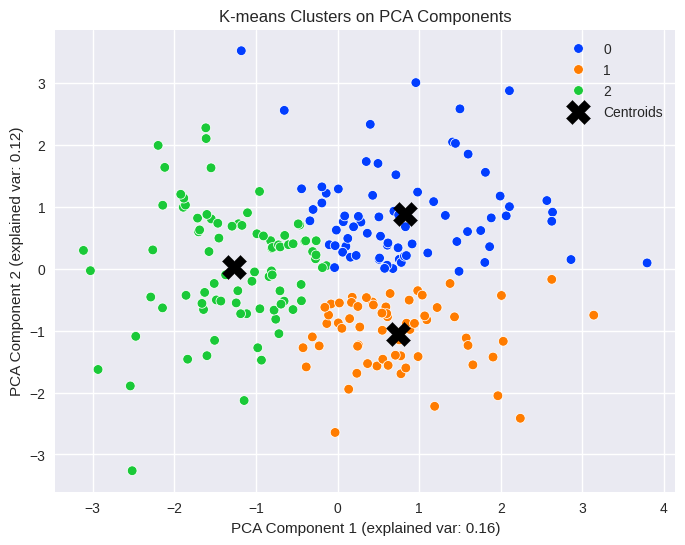

In [9]:
plt.figure(figsize=(8,6))
palette = sns.color_palette('bright', kmeans.k)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette=palette)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('K-means Clusters on PCA Components')
plt.xlabel(f'PCA Component 1 (explained var: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PCA Component 2 (explained var: {pca.explained_variance_ratio_[1]:.2f})')
plt.legend()
plt.show()
